In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
for column in df.columns:
    print("Unique values:",column)
    print(df[column].unique())
    print()


Unique values: id
[ 9046 51676 31112 ... 19723 37544 44679]

Unique values: gender
['Male' 'Female' 'Other']

Unique values: age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [8]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

([<matplotlib.axis.XTick at 0x14237253a90>,
 [Text(0, 0, 'No Stroke'), Text(1, 0, 'Stroke')])

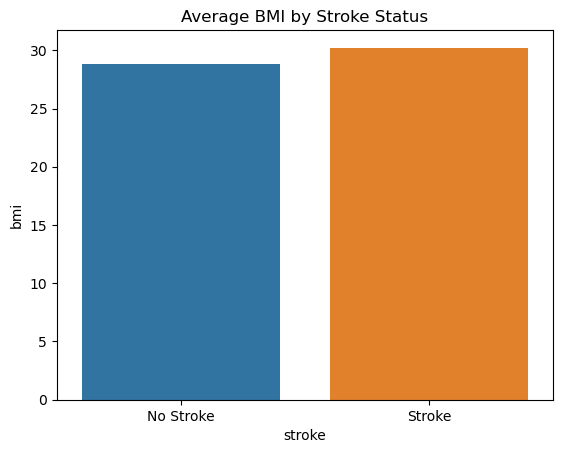

In [9]:
sns.barplot(data=df, x='stroke', y='bmi', estimator='mean', ci=None)
plt.title("Average BMI by Stroke Status")
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'])


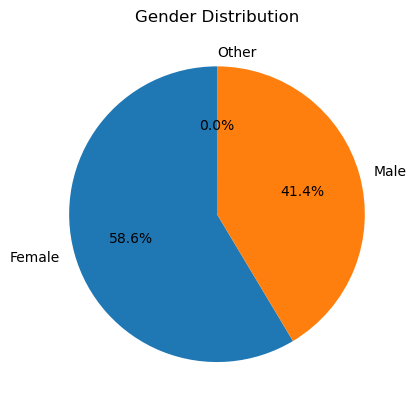

In [10]:
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

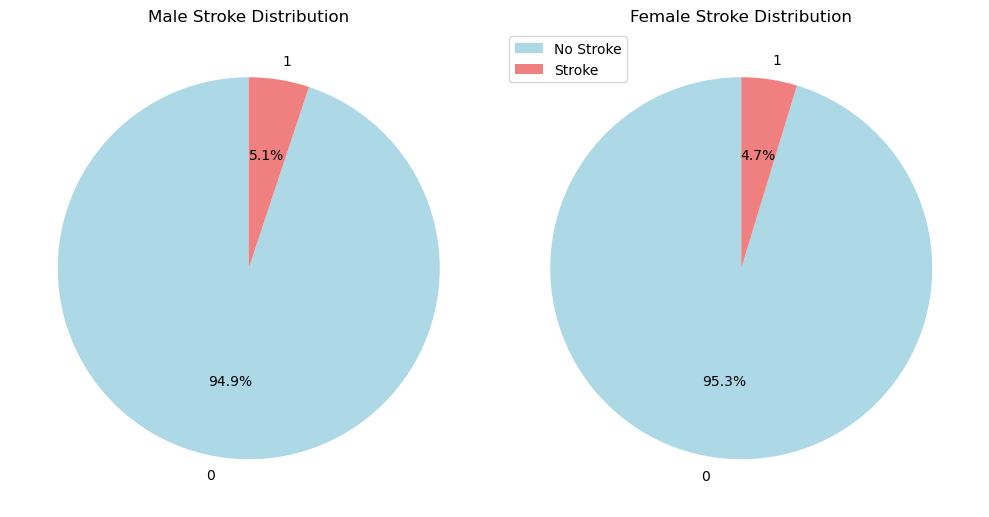

In [11]:
stroke_gender_counts = df.groupby(['gender', 'stroke']).size().unstack()
colors = ['lightblue', 'lightcoral']  
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1) 
plt.pie(stroke_gender_counts.loc['Male'], labels=stroke_gender_counts.columns, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Male Stroke Distribution")
plt.subplot(1, 2, 2)
plt.pie(stroke_gender_counts.loc['Female'], labels=stroke_gender_counts.columns, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Female Stroke Distribution")
plt.legend(labels=['No Stroke', 'Stroke'], loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


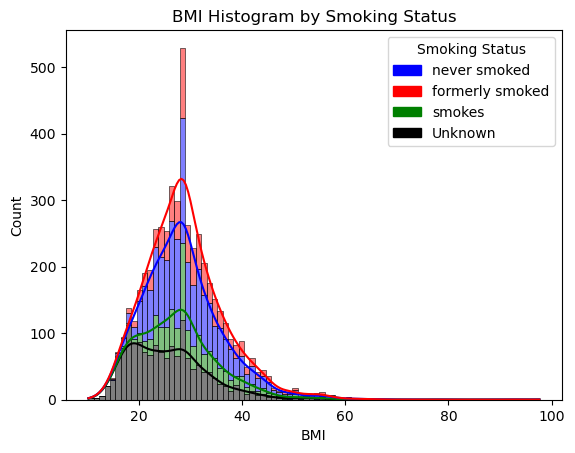

In [12]:
colors = {
    'never smoked': 'blue',
    'formerly smoked': 'red',
    'smokes': 'green',
    'Unknown': 'black'
}
sns.histplot(data=df, x='bmi', hue='smoking_status', kde=True,
             multiple='stack', palette=colors)
plt.title("BMI Histogram by Smoking Status")
plt.xlabel("BMI")
plt.ylabel("Count")
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
labels = list(colors.keys())
plt.legend(handles, labels, title='Smoking Status')
plt.show()


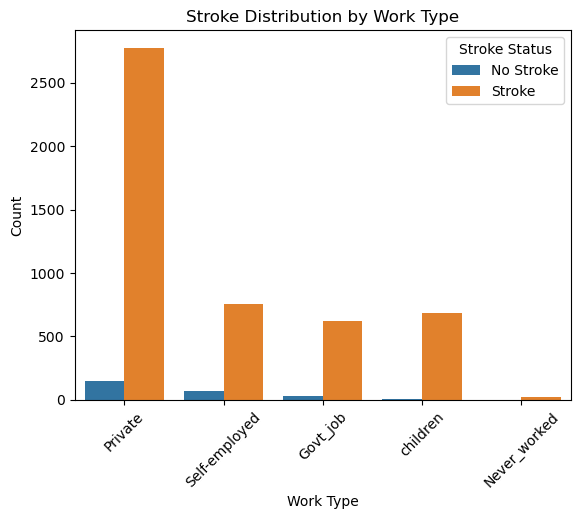

In [13]:
df['work_type'] = df['work_type'].astype(str)
df['stroke'] = df['stroke'].astype(str)
sns.countplot(data=df, x='work_type', hue='stroke')
plt.title("Stroke Distribution by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.legend(title='Stroke Status', labels=['No Stroke', 'Stroke'])
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df.columns = df.columns.str.strip()
le = LabelEncoder()

In [20]:
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    df[col] = le.fit_transform(df[col])

In [21]:

X = df.drop('stroke', axis=1)
y = df['stroke']


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
scaler = StandardScaler()


In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print("KNN Accuracy:", accuracy_score(y_test, knn.predict(X_test_scaled)))


KNN Accuracy: 0.9403131115459883


# Gaussian Navie Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print("Gaussian NB Accuracy:", accuracy_score(y_test, gnb.predict(X_test_scaled)))


Gaussian NB Accuracy: 0.8669275929549902


# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train_scaled, y_train)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logr.predict(X_test_scaled)))


Logistic Regression Accuracy: 0.9393346379647749


# SVC

In [35]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test_scaled)))


SVM Accuracy: 0.9393346379647749


# Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test_scaled)))

Decision Tree Accuracy: 0.910958904109589


# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test_scaled)))

Random Forest Accuracy: 0.9373776908023483


# AdaBoostClassifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train_scaled, y_train)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada.predict(X_test_scaled)))


AdaBoost Accuracy: 0.9393346379647749


# GradientBoostingClassifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb.predict(X_test_scaled)))


Gradient Boosting Accuracy: 0.9393346379647749


# Observation

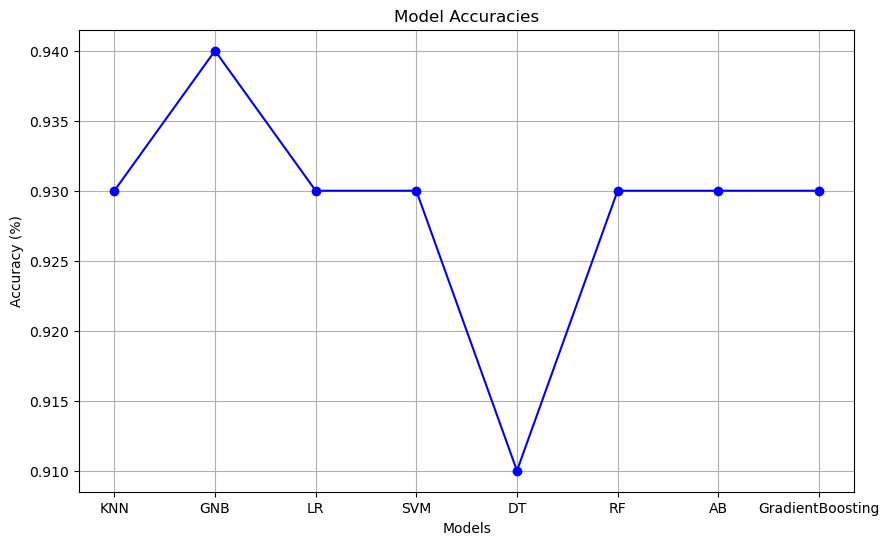

In [40]:
models = ['KNN', 'GNB', 'LR', 'SVM', 'DT', 'RF', 'AB',  'GradientBoosting']
accuracies = [0.93,0.94,0.93,0.93,0.91,0.93,0.93,0.93]
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()